In [1]:
import sys
if sys.platform.startswith('linux'): # or win
    print("in linux")
    file_path = "/home/ncslaber/109-2/tree_experiment/npy_depth/"
#     sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
else:
    file_path = r"G:/我的雲端硬碟/0327_align_depth/"

in linux


In [2]:
'''math tool'''
import csv
import numpy as np
import time

'''plot tool'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as ticker

'''image tool'''
import cv2
import statistics # as sta

'\ncv2.imshow("raw", npDepthF)\ncv2.waitKey(0)\ncv2.imshow("filtered", npDepthF_color)\ncv2.waitKey(0)\n# cv2.destroyAllWindows()\ncv2.destroyWindow("raw")\n'

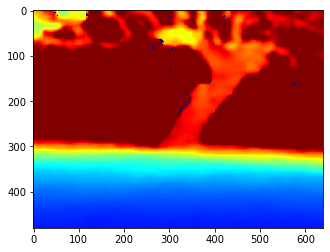

In [34]:
'''load file'''
npDepth = []

# with open(file_path + 'far_1_p_notTIlt.csv', 'r') as csvfile:
#   rows = csv.reader(csvfile, delimiter=',')
#   for row in rows:
#     npDepth.append(row)
# npDepth = np.asanyarray(npDepth)
# print(npDepth.dtype) # U5 means string length < 5
# print(npDepth.shape)
# npDepth = npDepth.astype('uint16')

npDepth = np.load(file_path+"p_1_middle.npy")

npDepthF = cv2.convertScaleAbs(npDepth, alpha=0.04) # 6m
npDepthF_color = cv2.applyColorMap(npDepthF, cv2.COLORMAP_JET)
plt.imshow(cv2.cvtColor(npDepthF_color, cv2.COLOR_BGR2RGB))

'''
cv2.imshow("raw", npDepthF)
cv2.waitKey(0)
cv2.imshow("filtered", npDepthF_color)
cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.destroyWindow("raw")
'''

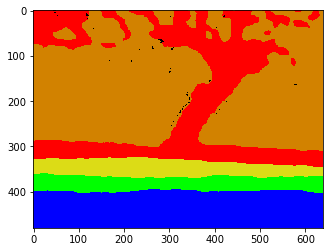

In [35]:
color_seq = {'brown': (0,130,210), 'red':(0,0,255),'yellow':(22,220,220),'green':(0,255,0),'blue':(255,0,0),'black':(0,0,0)}
npDepth_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))

npDepth_seg[npDepth<1500]=color_seq['blue']
npDepth_seg[np.logical_and(npDepth<2000,npDepth>1500)]=color_seq['green']
npDepth_seg[np.logical_and(npDepth<3000,npDepth>2000)]=color_seq['yellow']
npDepth_seg[np.logical_and(npDepth<6000,npDepth>3000)]=color_seq['red']
npDepth_seg[npDepth>6000]=color_seq['brown']
npDepth_seg[npDepth==0]=color_seq['black']

npDepth_seg = npDepth_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npDepth_seg, cv2.COLOR_BGR2RGB))

In [ ]:
'''plot 3D color surface'''
%matplotlib qt
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
y = np.linspace(0,479,480) # data of [:x] column
x = np.linspace(0,639,640) # data of [x:] row
X,Y = np.meshgrid(x,y)
print(npDepthF.shape)
initial_cmap = cm.get_cmap('rainbow')
# reversed_cmap=initial_cmap.reversed()
surf = ax3.plot_surface(X, Y, npDepthF, cmap=initial_cmap)
plt.title('Depth tree', fontsize='15')
plt.xlabel('X[pixel]', fontsize='15')
plt.ylabel('Y[pixel]', fontsize='15')
fig3.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [27]:
def depth(x,y):
    return npDepth[x][y]

In [36]:
class Point3D:
    x: int = 0
    y: int = 0
    z: int = 0
cx_d = 328 #424
cy_d = 241 #241
fx_d = 617 #424
fy_d = 617 #424

npPointX = np.asarray(range(640))-cx_d
npPointX = np.diag(npPointX)
npPointX = npDepth.dot(npPointX)/ fx_d * (-1)

npPointY = np.asarray(range(480))-cy_d
npPointY = np.diag(npPointY)
npPointY = npPointY.dot(npDepth)/ fy_d * (-1) + 360

npPointY = npPointY.astype('float16')

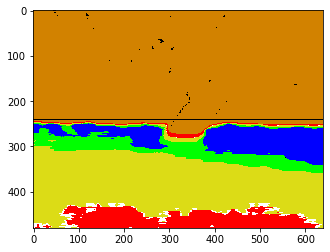

In [38]:
'''depth segmentation'''
npHeight = np.copy(npPointY)
color_seq = {'brown': (0,130,210), 'red':(0,0,255),'yellow':(22,220,220),
                'green':(0,255,0),'blue':(255,0,0),'black':(0,0,0)}
npHeight_seg = np.zeros((npDepth.shape[0],npDepth.shape[1],3))

npHeight_seg[npHeight<-160]=color_seq['blue']
npHeight_seg[np.logical_and(npHeight<-80,npHeight>-160)]=color_seq['green']
npHeight_seg[np.logical_and(npHeight<0,npHeight>-80)]=color_seq['yellow']
npHeight_seg[np.logical_and(npHeight<80,npHeight>0)]=color_seq['red']
npHeight_seg[npHeight>80]=color_seq['brown']
npHeight_seg[npHeight==360]=color_seq['black']
npHeight_seg[np.logical_and(npHeight<0.9,npHeight>-0.9)]=(255,255,255)

npHeight_seg = npHeight_seg.astype('uint8')
%matplotlib inline
plt.imshow(cv2.cvtColor(npHeight_seg, cv2.COLOR_BGR2RGB))

In [7]:
'''plot 3D color surface'''
%matplotlib qt
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
y = np.linspace(0,479,480) # data of [:x] column
x = np.linspace(0,639,640) # data of [x:] row
X,Y = np.meshgrid(x,y)
print(npPointY.shape)
initial_cmap = cm.get_cmap('rainbow')
# reversed_cmap=initial_cmap.reversed()
surf = ax3.plot_surface(X, Y, npPointY, cmap=initial_cmap)
plt.title('Elevation mapping', fontsize='15')
plt.xlabel('X[pixel]', fontsize='15')
plt.ylabel('Y[pixel]', fontsize='15')
fig3.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

(480, 640)


In [16]:
npHeight = np.copy(npPointY)
height,width = npHeight.shape
ground_height = np.array([])
layer = 20

ground_height = npHeight[height-layer*10: height][npHeight[height-layer*10: height]!=360]
ground_height = ground_height.astype('float64')

meanGrass = statistics.mean(ground_height)
medianGrass = statistics.median(ground_height)
stdevGrass = statistics.stdev(ground_height)

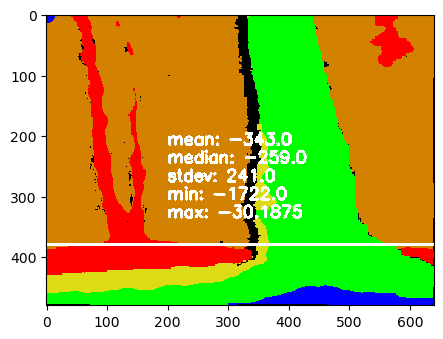

In [32]:
npDepth_seg_c = np.copy(npDepth_seg)
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'mean: '+str(np.trunc(meanGrass)), #text
            (200,200+15), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'median: '+str(medianGrass), #text
            (200,200+45), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'stdev: '+str(np.trunc(stdevGrass)), #text
            (200,200+75), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'min: '+str(np.min(ground_height)), #text
            (200,200+105), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.putText(npDepth_seg_c, #numpy array on which text is written
            'max: '+str(np.max(ground_height)), #text
            (200,200+135), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,255,255), #font color
            3) #font stroke
cv2.line(npDepth_seg_c, (0,380),(640,380),(255,255,255),3)
%matplotlib inline
fig,ax = plt.subplots(figsize=(5,4), dpi = 100)
plt.imshow(cv2.cvtColor(npDepth_seg_c, cv2.COLOR_BGR2RGB))

328 429
328 430
334 579
334 580
334 581
334 582
334 583
334 584
334 585
334 586
336 571
336 572
336 573
336 574
336 575
337 442
337 443
338 199
338 200
338 445
338 446
338 570
338 571
338 572
338 573
338 574
338 575
339 557
339 558
339 559
339 560
339 561
339 585
339 586
339 587
339 588
341 456
341 457
341 519
341 520
341 555
341 556
341 557
341 558
341 559
341 560
341 561
341 562
341 563
341 564
341 577
341 578
341 579
341 580
341 581
341 582
341 583
341 584
341 585
341 586
342 586
342 587
342 588
342 589
343 463
343 464
343 562
343 563
343 564
343 565
343 566
343 567
343 568
343 569
343 570
343 571
343 572
343 573
343 574
343 575
343 576
343 577
343 578
343 579
343 580
343 581
344 459
344 526
344 527
344 528
344 551
344 552
344 553
344 554
344 555
344 556
344 557
344 558
344 559
344 584
344 585
344 586
345 488
345 570
345 571
345 572
345 573
346 502
346 505
346 506
346 507
346 508
346 509
346 510
346 511
346 512
346 513
346 514
346 515
346 523
346 524
346 525
346 526
346 527
346 528


389 446
389 447
389 448
389 449
389 450
389 451
389 452
389 453
389 454
389 455
389 456
389 457
389 458
389 459
389 460
389 461
389 498
389 499
389 500
389 501
389 502
389 503
389 504
389 505
389 529
389 530
389 531
389 532
389 533
389 534
389 535
389 536
389 537
389 538
389 539
389 540
389 541
389 542
389 553
389 554
389 555
389 556
389 557
389 558
389 559
389 560
389 561
389 562
389 563
390 437
390 438
390 439
390 440
390 441
390 442
390 443
390 444
390 445
390 446
390 447
390 448
390 449
390 450
390 451
390 452
390 453
390 454
390 455
390 456
390 457
390 458
390 459
390 460
390 461
390 462
390 463
391 429
391 430
391 431
391 432
391 433
391 434
391 435
391 436
391 437
391 438
391 439
391 440
391 441
391 453
391 454
391 455
391 456
391 457
391 458
391 459
391 460
391 461
391 462
391 463
392 442
392 443
392 444
392 445
392 446
392 447
392 448
392 449
392 450
392 451
392 452
393 439
393 440
393 441
393 442
393 443
393 444
393 445
393 446
393 447
393 448
393 449
393 450
393 451
393 452


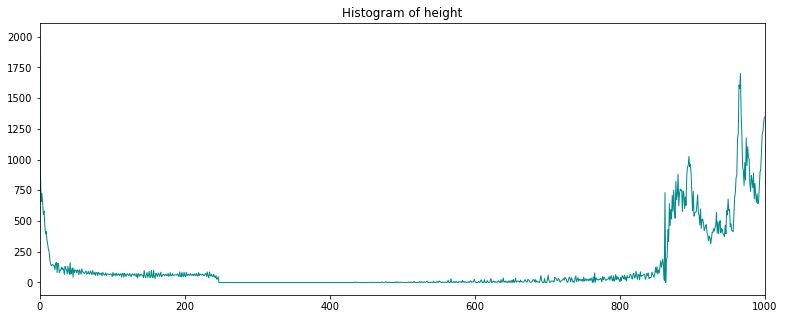

In [28]:
HOG_height = np.zeros(1000)
for i in range(height-layer*10, height):
    for j in range(width):
        if npHeight[i][j]!=360:
            index = int(npHeight[i][j])
            if index == 0:
                print(i,j)
            HOG_height[index] = HOG_height[index]+1

fig = plt.subplots(figsize=(13,5))
plt.plot(HOG_height, linewidth=1.0, color='#008b8b', label='right')
x_ticks = np.arange(-2000,1,250)
plt.xlim(0,1000)
# plt.xticks(x_ticks)
plt.title('Histogram of height')
plt.show()

In [31]:
npHeight[np.logical_and(npHeight<0.9,npHeight>-0.9)].shape

(1920,)

In [19]:
HOG_height[1]

899.0

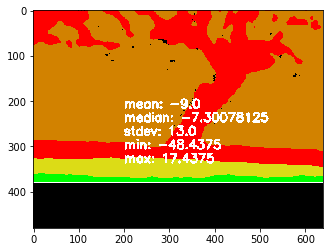

In [12]:
npDepth_seg_c[height-layer*10: height][npHeight[height-layer*10:height]<-166.0]=(0,0,0)
plt.imshow(cv2.cvtColor(npDepth_seg_c, cv2.COLOR_BGR2RGB))

In [ ]:
npHeight_copy = np.copy(npHeight)
npHeight_copy = npHeight_copy.astype('float32')

ret, npHeight_copy = cv2.threshold(npHeight_copy, -259, 255, cv2.THRESH_BINARY_INV)
cv2.line(npHeight_copy, (0,380),(640,380),(0,0,0),3)
cv2.imshow('binarize', npHeight_copy)
cv2.waitKey(0)

'''
mask = np.zeros_like(npHeight_copy)   
layer = 10
region_of_interyest_vertices = [(0, height-layer*10),(width, height-layer*10),(width,height),(0,height)] 
cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32),255)
masked_img = cv2.bitwise_and(npHeight_copy, mask)
cv2.imshow('threshold3', masked_img)
cv2.waitKey(0)



ret, masked_img = cv2.threshold(masked_img, 170, 255, cv2.THRESH_BINARY)
cv2.imshow('threshold4', masked_img)
cv2.waitKey(0)
'''
cv2.destroyAllWindows()